# Lab: Logistic regression - Titanic

https://www.kaggle.com/c/titanic/data

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
plt.rcParams["figure.figsize"] = (4, 3)  # width=4, height=3 inches


In [2]:
import sklearn as sk

In [3]:
filename = 'titanic'

from urllib.request import urlretrieve
urlretrieve("https://bianchi.wp.imt.fr/files/2023/12/titanic.zip", filename + '.zip')

import os
zip_file = os.path.join(os.getcwd(), 'titanic.zip')

import zipfile
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [4]:
df = pd.read_csv("traintitanic.csv")


In [7]:
# Using df.head(), info(), describe() etc. inspect the dataset. Which features are numerical, which ones are categorical? Comment about missing data.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


NaN value, missing value, how can we complete the dataframe. 

<Axes: >

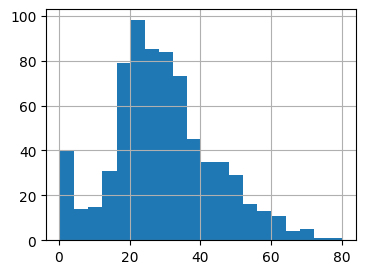

In [10]:
# Plot the histogram of Passenger's classes using df['mycolumn'].hist()
# YOUR CODE HERE
df['Age'].hist(bins=20)


In [11]:
# Comment about the impact of the sex of passengers
df.groupby("Sex").mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [12]:
# Comment about the impact of the embarkation city. How do you explain the discrepancies in survival rate?
df.groupby("Embarked").mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


<Axes: >

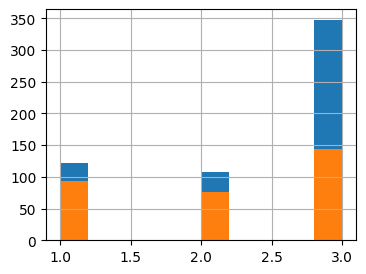

In [13]:
#Plot the histogram of the number of men in each class. Do the same for men. Comment.
df[df['Sex']=="male"].Pclass.hist()
df[df['Sex']=="female"].Pclass.hist()

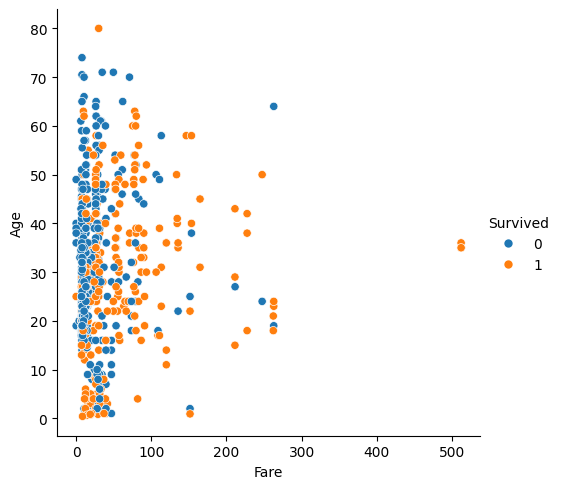

In [14]:
# Comment briefly the following code
sns.relplot(data=df,x="Fare", y="Age",hue="Survived")

In [ ]:
# If you believe that other plots are interesting to vizualize the data set, you can provide them here.
# YOUR CODE HERE

# Categorical encoding

Certain columns (sex, embarked, etc.) are categorical. We need to transform them into numerical features.

In [15]:
# Create a new column "Sex_num" where the strings "male" and "female" are replaced by a binary integer.
df["Sex_num"] = (df["Sex"]=="male").astype("int") #That's ok because there is no missing data in the "Sex" column

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Pour le sexe, male = 1 et female = 0

Maintenant pour encoder le port d'ebarcation il n'est pas possible de défnir 1,2,3 puisque on les classe et on donne plus d'importantce à l'un qu'à l'autr, pour palier: one hot encoding 
|  Q  | S  |  C

In [17]:
# What is the following code doing?
pd.get_dummies(df['Embarked'])
# one hot encoding

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [18]:
# Using pd.get_dummies, create new columns in the dataframe df, one for each embarkation port
ports = pd.get_dummies(df['Embarked'])
df[ports.columns] = ports

In [19]:
# We may drop the two columns "Sex" and "Embarked", as we now included their onehot counterparts in the dataframe. Check that the following code drops theses columns
df.drop(columns=["Sex","Embarked"])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_num,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,True,False,False


In [ ]:
# Use df.head(). Did the dropped column disappear? Solve possible issued using the argument inplace=True, in the drop method
df.head()
# YOUR CODE HERE

In [ ]:
# What does the matrix df.corr() represent? Provide your interpretation of the numbers you see.
sns.set(rc={'figure.figsize': (11, 8)})  
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.rcParams["figure.figsize"] = (4, 3) 

# Data cleansing
Check the number of missing values in "Age". You can either


*   Do nothing (the rows with missing "Age" will be ignored in the training stage)
*   Or fill the missing values with some value of your choice.


Do something smart.



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_num      891 non-null    int64  
 13  C            891 non-null    bool   
 14  Q            891 non-null    bool   
 15  S            891 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(5)
memory usage: 93.2+ KB


In [22]:
# This code handles the problem of missing values in the "Age" column. What is it doing?
age_per_class = df.groupby("Pclass")["Age"].mean()
df["Age_filled"] = df[['Age','Pclass']].apply(lambda x:age_per_class[x[1]] if pd.isna(x[0]) else x[0], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_num      891 non-null    int64  
 13  C            891 non-null    bool   
 14  Q            891 non-null    bool   
 15  S            891 non-null    bool   
 16  Age_filled   891 non-null    float64
dtypes: bool(3), float64(3), int64(6), object(5)
memory usage: 100.2+ KB


/tmp/ipykernel_3489/3945431632.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["Age_filled"] = df[['Age','Pclass']].apply(lambda x:age_per_class[x[1]] if pd.isna(x[0]) else x[0], axis=1)


In [23]:
# We will train a logistic regression. Write below the columns which you would like to keep as features for logistic regression.
# n.b.: We will NOT keep the columns Ticket and Cabin. Why?

mycolumns = ["Age_filled", "S", "C", "Q", "Sex_num", "Pclass", "Fare", "SibSp"]

# Logistic regression


In [24]:
# Train a logistic regression classifier using sklearn, based on the above dataframe and the chosen columns.
# Explain the meaning of the parameter in the logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#lr = LogisticRegression(penalty='l2',C=1.0,max_iter=1000)

In [25]:
# Fit the model to (df[mycolumns],df["Survived"])
lr.fit(df[mycolumns],df["Survived"])


/home/ambroise012/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# Display the coefficients of the logistic regression. Discuss the possible positive/negative impact on survival of certain parameters
lr.coef_

# Performance evaluation


In [ ]:
# Load the test data
Xtest = pd.read_csv("testtitanic.csv")
ytest = pd.read_csv("gender_submission.csv")
dftest = pd.merge(Xtest,ytest)

In [ ]:
# Process the test features in order to obtain the same format as for the train set
dftest["Sex_num"] = (dftest["Sex"]=="male").astype("int")
dftest[pd.get_dummies(dftest['Embarked']).columns] = pd.get_dummies(dftest['Embarked'])
dftest["Age_filled"] = dftest[['Age','Pclass']].apply(lambda x:age_per_class[x[1]] if pd.isna(x[0]) else x[0], axis=1)

In [ ]:
# Define a dataframe with only the columns you want to keep (and the label)
dftest=dftest[mycolumns+["Survived"]]
dftest.head()

In [ ]:
# Check if there are some missing values. If needed, row containing missing values can be dropped using the dropna() method (inplace)
dftest[mycolumns].info()

In [ ]:
dftest.dropna(inplace=True)
dftest.info()

In [ ]:
# Compute the hard predictions on the test set (using only the columns to keep). Use the .predict method

lr.predict(dftest[mycolumns])


In [ ]:
dftest.Survived

In [ ]:
# Compute the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(lr.predict(dftest[mycolumns]),dftest["Survived"])

In [ ]:
# Compute the soft predictions using predict_proba

lr.predict_proba(dftest[mycolumns])


In [ ]:
# What is the following code doing?
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr, dftest[mycolumns], dftest.Survived);

# Optimization
Implement your own gradient descent, and compare your prediction with sklearn.

In [ ]:
# Complete the following code
def gradient_descent(loss_gradient, initial_w, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
    """
    Performs gradient descent to minimize a loss function.

    Parameters:
    - loss_gradient: function computing the gradient ∇L(w), takes w as input
    - initial_w: initial guess (numpy array)
    - learning_rate: step size (float)
    - n_iterations: max number of iterations (int)
    - tolerance: stopping criterion based on gradient norm (float)

    Returns:
    - w: optimized parameters
    - history: list of w at each iteration
    """
    w = initial_w.copy()
    history = [w.copy()]

    for i in range(n_iterations):

        
        # YOUR CODE HERE: COMPUTE GRADIENT + UPDATE w
        grad = loss_gradient(w)
        w = w - learning_rate * grad

        
        if np.linalg.norm(grad) < tolerance:
            break
        history.append(w.copy())
        
    return w, history


In [ ]:
# Complete the following code
import numpy as np

def sigmoid(z):

    return 1 / (1 + np.exp(-z)) 

def loss(w, Xtrain, ytrain):
    """
    Logistic loss (log loss) for binary classification.

    Parameters:
    - w: weight vector, shape (d,)
    - Xtrain: training features, shape (n, d)
    - ytrain: binary labels (0 or 1), shape (n,)

    Returns:
    - loss (float)
    """
    ytrain = np.reshape(ytrain, (-1, 1))

    # YOUR CODE HERE
    z = Xtrain @ w
    p = sigmoid(z)
    loss = np.mean( -ytrain*np.log(p) - (1-ytrain)*np.log(1-p) )
    
    return loss

def loss_gradient(w, Xtrain, ytrain):
    """
    Gradient of logistic loss with respect to w.

    Parameters:
    - w: weight vector, shape (d,)
    - Xtrain: training features, shape (n, d)
    - ytrain: binary labels (0 or 1), shape (n,)

    Returns:
    - gradient vector, shape (d,)
    """
    ytrain = np.reshape(ytrain, (-1, 1))
    
    #YOUR CODE HERE 
    z = Xtrain @ w
    p = sigmoid(z)
    grad = Xtrain.T @ (p-ytrain) / len(ytrain)
    
    return grad


In [ ]:
# The next cell preprocesses the features, column per column, and add an intercept.
# Each column is centered and standardized - except for categorical columns
# You don't have to go through the code (only if you wish), you may just run the cell.


from sklearn.preprocessing import StandardScaler

def preprocess_features(Xraw):
    """
    Preprocess a DataFrame for regression or classification:
    - Adds a bias column of 1s
    - Standardizes continuous numeric columns
    - Leaves binary columns (0/1) unscaled
    - Ignores non-numeric columns
    Returns a NumPy array.
    """

    # Only numeric columns
    numeric_df = Xraw.select_dtypes(include=[np.number])

    # Identify binary and continuous numeric columns
    is_binary = numeric_df.nunique() == 2
    binary_columns = numeric_df.columns[is_binary]
    continuous_columns = numeric_df.columns[~is_binary]

    # Scale continuous columns
    scaler = StandardScaler()
    X_cont = scaler.fit_transform(numeric_df[continuous_columns])

    # Binary columns as float
    X_bin = numeric_df[binary_columns].to_numpy(dtype=np.float64)

    # Combine bias, scaled continuous, and unscaled binary columns
    n_samples = Xraw.shape[0]
    Xtrain = np.hstack([
        np.ones((n_samples, 1)),  # Bias column
        X_cont,
        X_bin
    ])

    return Xtrain


In [ ]:
# Apply the preprocessing to the features - convert labels to numpy
Xtrain = preprocess_features(df[mycolumns])
ytrain = df["Survived"].to_numpy()


In [ ]:
# Let us test if our functions loss and loss_gradient are working!

# Choose the initial weight vector
d = Xtrain.shape[1]
w0 = np.random.randn(d,1)

# Evaluate the loss
print(loss(w0,Xtrain,ytrain))

#Evaluate the norm of the gradient
gradient = loss_gradient(w0,Xtrain,ytrain)
print(gradient.shape)

In [ ]:
# Finally, run the gradient descent

# YOU CODE HERE
w, history = gradient_descent( lambda w:loss_gradient(w,Xtrain,ytrain) , initial_w=w0 )


    

In [ ]:
# Plot the loss as a function of the number of iterations. Does the algorithm seem to converge?
monitor_loss = [loss(history[i],Xtrain, ytrain) for i in range(len(history))]
plt.plot(monitor_loss)

# Homework
- Download a dataset, for multi-class classification (digit recognition, whatever you like)
- Separate the data between train and test set
- Make a brief exploratory data analysis (display the first samples, make any comment that you may find useful)
- Apply k-nearest neighbors (choose k as you wish) and logistic regression
- Compare the results by plotting the confusion matrix, for both methods. The confusion matrix should be computed on the test set.

